In [4]:
!python -m textblob.download_corpora
import matplotlib.pyplot as plt
import tweepy 
import pandas as pd
import numpy as np
from textblob import TextBlob
%matplotlib inline 
consumer_key= '********************'
consumer_secret= "************************"
access_token= "*********************************"
access_token_secret= "********************"
# Instead of the key * is shown because of security purposes
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)




[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


The topic on which you want to find the sentiment of twitter users on:
Trump
Enter the date in format YY-MM-DD
2020-06-01


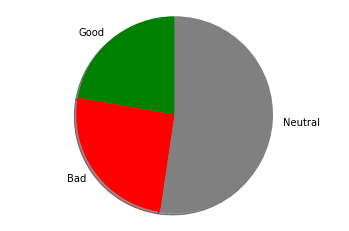

In [7]:
print("The topic on which you want to find the sentiment of twitter users on:")
tweet_input=input()
tweet_input= tweet_input + "-filter:retweets"
print("Enter the date in format YY-MM-DD")
date_since=input()
public_tweets= tweepy.Cursor(api.search,q=tweet_input,lang="en",since=date_since).items(1000)
tweets_from_input=[[tweet.text,tweet.user.screen_name,tweet.user.location] for tweet in public_tweets]

df=pd.DataFrame.from_records(tweets_from_input)

sentiments_are=[]
b=0
c=0
d=0
for tweetss in df[0]:
  blob=TextBlob(tweetss)
  for sentence in blob.sentences:
    sentiments_are.append(sentence.sentiment.polarity)


for i in sentiments_are:
  if (i > 0):
    b=b+1
  elif (i < 0):
    c=c+1
  elif (i == 0.0): 
    d=d+1


Text=TextBlob(tweet_input).sentiment.polarity
if Text > 0:
  b=b*1.1
  c=c*1
  d=d*0.7
elif Text < 0:
  b=b*0.75
  c=c*1.25
  d=d*0.7  
else:
  b=b*0.80
  c=c*1.2
  d=d*0.7
that=[b,c,d]
happy_sad_neutral=that
happy_sad_neutral
labels='Good','Bad','Neutral'
sizes=happy_sad_neutral
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,colors=['green', 'red', 'grey'],
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()
